## **Air Quality and Pollution Assessment**

**Introduction**

In this project, I will develop a machine learning model to predict air quality levels based on critical environmental and demographic factors. This is a supervised classification problem where the target variable categorizes air quality into four levels: Good, Moderate, Poor, and Hazardous. The goal is to uncover patterns influencing air pollution and to provide actionable insights for improving air quality in affected regions.

**dataset url:** https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment
 
### **Definig the Business Problem**

Air pollution poses significant environmental and public health challenges, affecting millions worldwide. Understanding and predicting air quality levels can help policymakers implement targeted measures to reduce pollution and safeguard public health.

**1.1 Context**  
This dataset captures critical factors influencing air pollution levels across various regions. Key features include:  
- **Environmental Metrics:** Temperature, humidity, and concentrations of PM2.5, PM10, NO2, SO2, and CO.  
- **Demographic Metrics:** Population density and proximity to industrial areas.

The project aims to predict air quality levels based on these factors, enabling proactive strategies to combat pollution.

**Project Objectives**

**1.** Identify the key factors influencing air quality.  
**2.** Develop a robust machine learning model to classify air quality levels.  
**3.** Provide actionable insights for mitigating air pollution and improving quality of life.  

**Expected Benefits**

**1.** Improved Decision-Making: Data-driven insights for policymakers and environmental agencies.  
**2.** Health Protection: Early identification of hazardous air quality to issue warnings.  
**3.** Sustainability Planning: Support long-term strategies for reducing pollution sources.  

By addressing the business problem, this project aims to contribute to better air quality management and public health outcomes.

##### **Importing Libraries**

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [137]:
df = pd.read_csv("data/updated_pollution_dataset.csv")
df.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


### **Explore the Dataset**

##### **Columns**

**1. Temperature (°C):** Average temperature of the region.  
**2. Humidity (%):** Relative humidity recorded in the region.  
**3. PM2.5 Concentration (µg/m³):** Fine particulate matter levels.  
**4. PM10 Concentration (µg/m³):** Coarse particulate matter levels.  
**5. NO2 Concentration (ppb):** Nitrogen dioxide levels.  
**6. SO2 Concentration (ppb):** Sulfur dioxide levels.  
**7. CO Concentration (ppm):** Carbon monoxide levels.  
**8. Proximity to Industrial Areas (km):** Distance to the nearest industrial zone.  
**9. Population Density (people/km²):** Number of people per square kilometer in the region.  
**10. Air Quality Levels:** Airs classification

**Obs:** Particulate matter is a group of pollutants consisting of dust, smoke, and other solid and liquid materials that remain suspended in the atmosphere due to their small size.

##### **Target**

**1. Good:** Clean air with low pollution levels.  
**2. Moderate:** Acceptable air quality but with some pollutants present.  
**3. Poor:** Noticeable pollution that may cause health issues for sensitive groups.  
**4. Hazardous:** Highly polluted air posing serious health risks to the population.  

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [139]:
# Descriptive statistics
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [140]:
# Checking at missing values
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [141]:
# Checking at duplicated values
df.duplicated().sum()

0

### **Split the data**


In [142]:
X = df.drop(columns=['Air Quality'])
y = df['Air Quality'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [143]:
print(f'X_train shape: {X_train.shape}.')
print(f'y_train shape: {y_train.shape}.')
print(f'X_test shape: {X_test.shape}.')
print(f'y_test shape: {y_test.shape}.')

X_train shape: (4000, 9).
y_train shape: (4000,).
X_test shape: (1000, 9).
y_test shape: (1000,).


### **Exploratory data analysis**

In [144]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
408,24.4,48.1,14.8,19.8,24.5,4.3,0.87,12.0,381,Good
3420,25.8,65.3,27.6,32.9,15.2,7.2,1.12,10.4,287,Good
1073,29.7,54.0,0.2,7.6,15.6,4.4,0.93,10.8,401,Good
169,29.5,83.3,4.7,22.7,35.9,14.7,2.97,5.2,631,Poor
3881,34.0,75.2,46.0,57.2,45.5,15.4,3.34,6.3,601,Hazardous


In [145]:
# Setting as the palette
colors = sns.color_palette("bone")

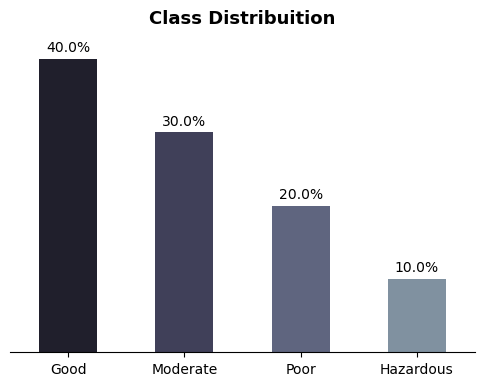

In [146]:
distribution = train['Air Quality'].value_counts(normalize=True) * 100

# Plot
ax = distribution.plot(kind='bar', color=colors, figsize=(6, 4))

for index, value in enumerate(distribution):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

ax.set_title('Class Distribuition', fontweight='bold', fontsize=13, pad=15, loc='center')
ax.yaxis.set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(rotation=0)
plt.show()


In [147]:
numerical_features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2',
                    'SO2',	'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

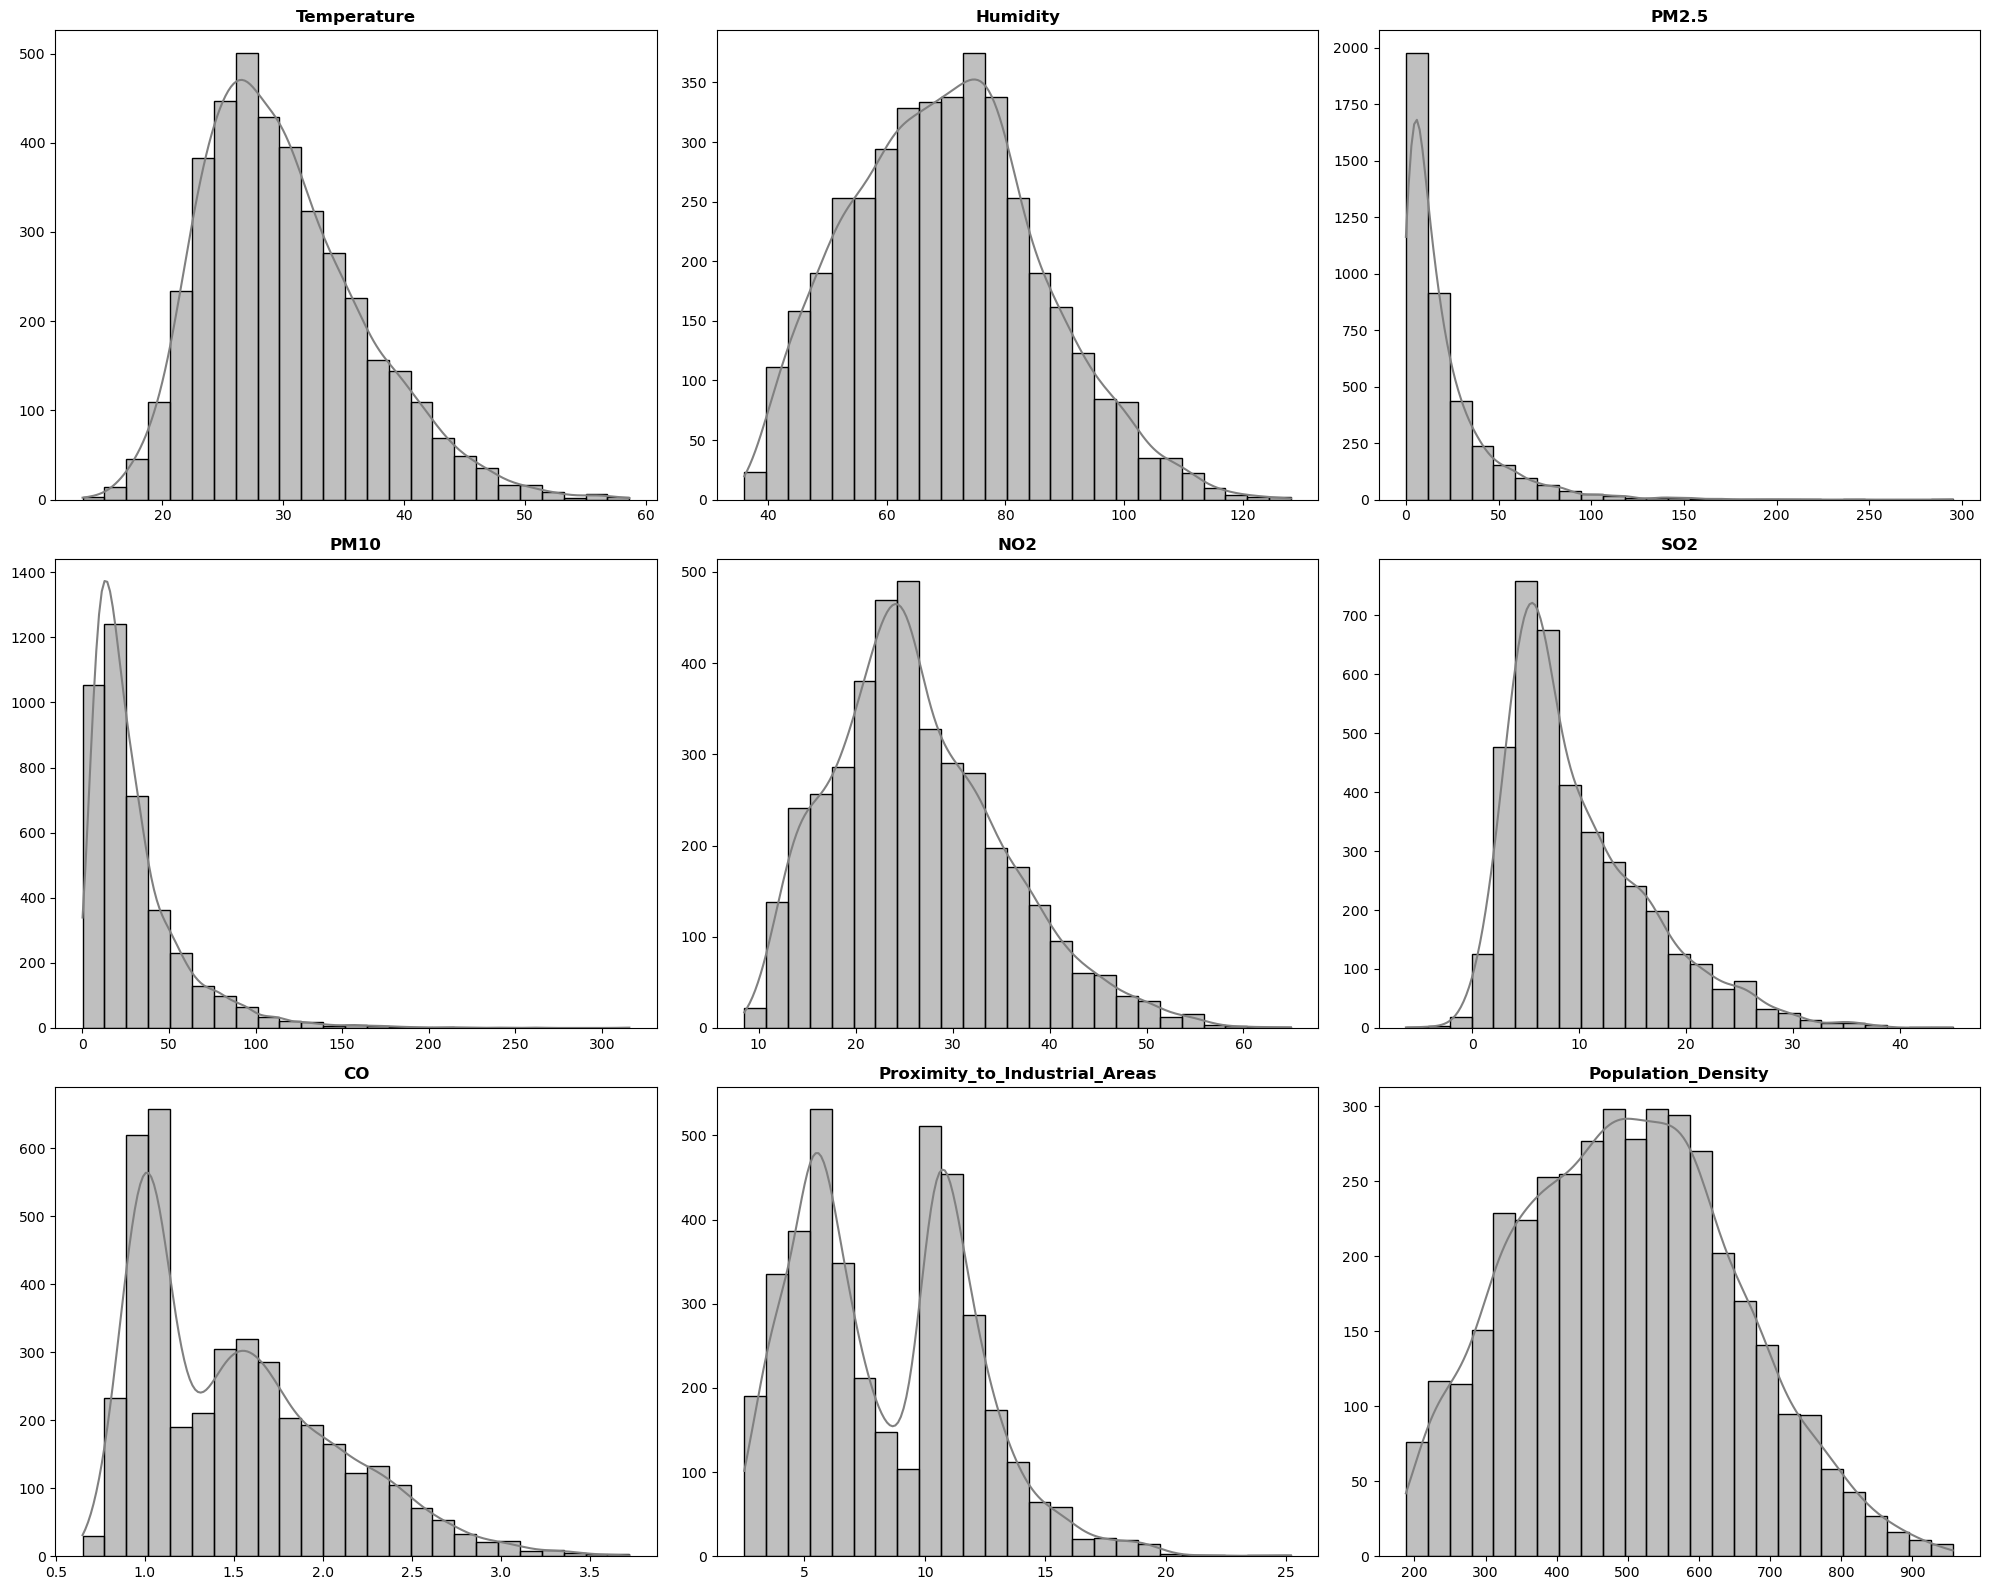

In [148]:
warnings.filterwarnings("ignore", category=FutureWarning)


num_features_count = len(numerical_features)
cols = 3
rows = (num_features_count + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(train[feature], color='gray', kde=True, bins=25, ax=axes[i])
    axes[i].set_title(feature, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Main insights:  
- Temperature ranges from approximately 20-40 degrees, while humidity varies from 60-100%.  
- Displays a multimodal distribution, suggesting the presence of distinct groups in proximity to industrial areas.  
- Exhibits a shape close to a normal distribution, concentrated between 200-600 people per analyzed unit.

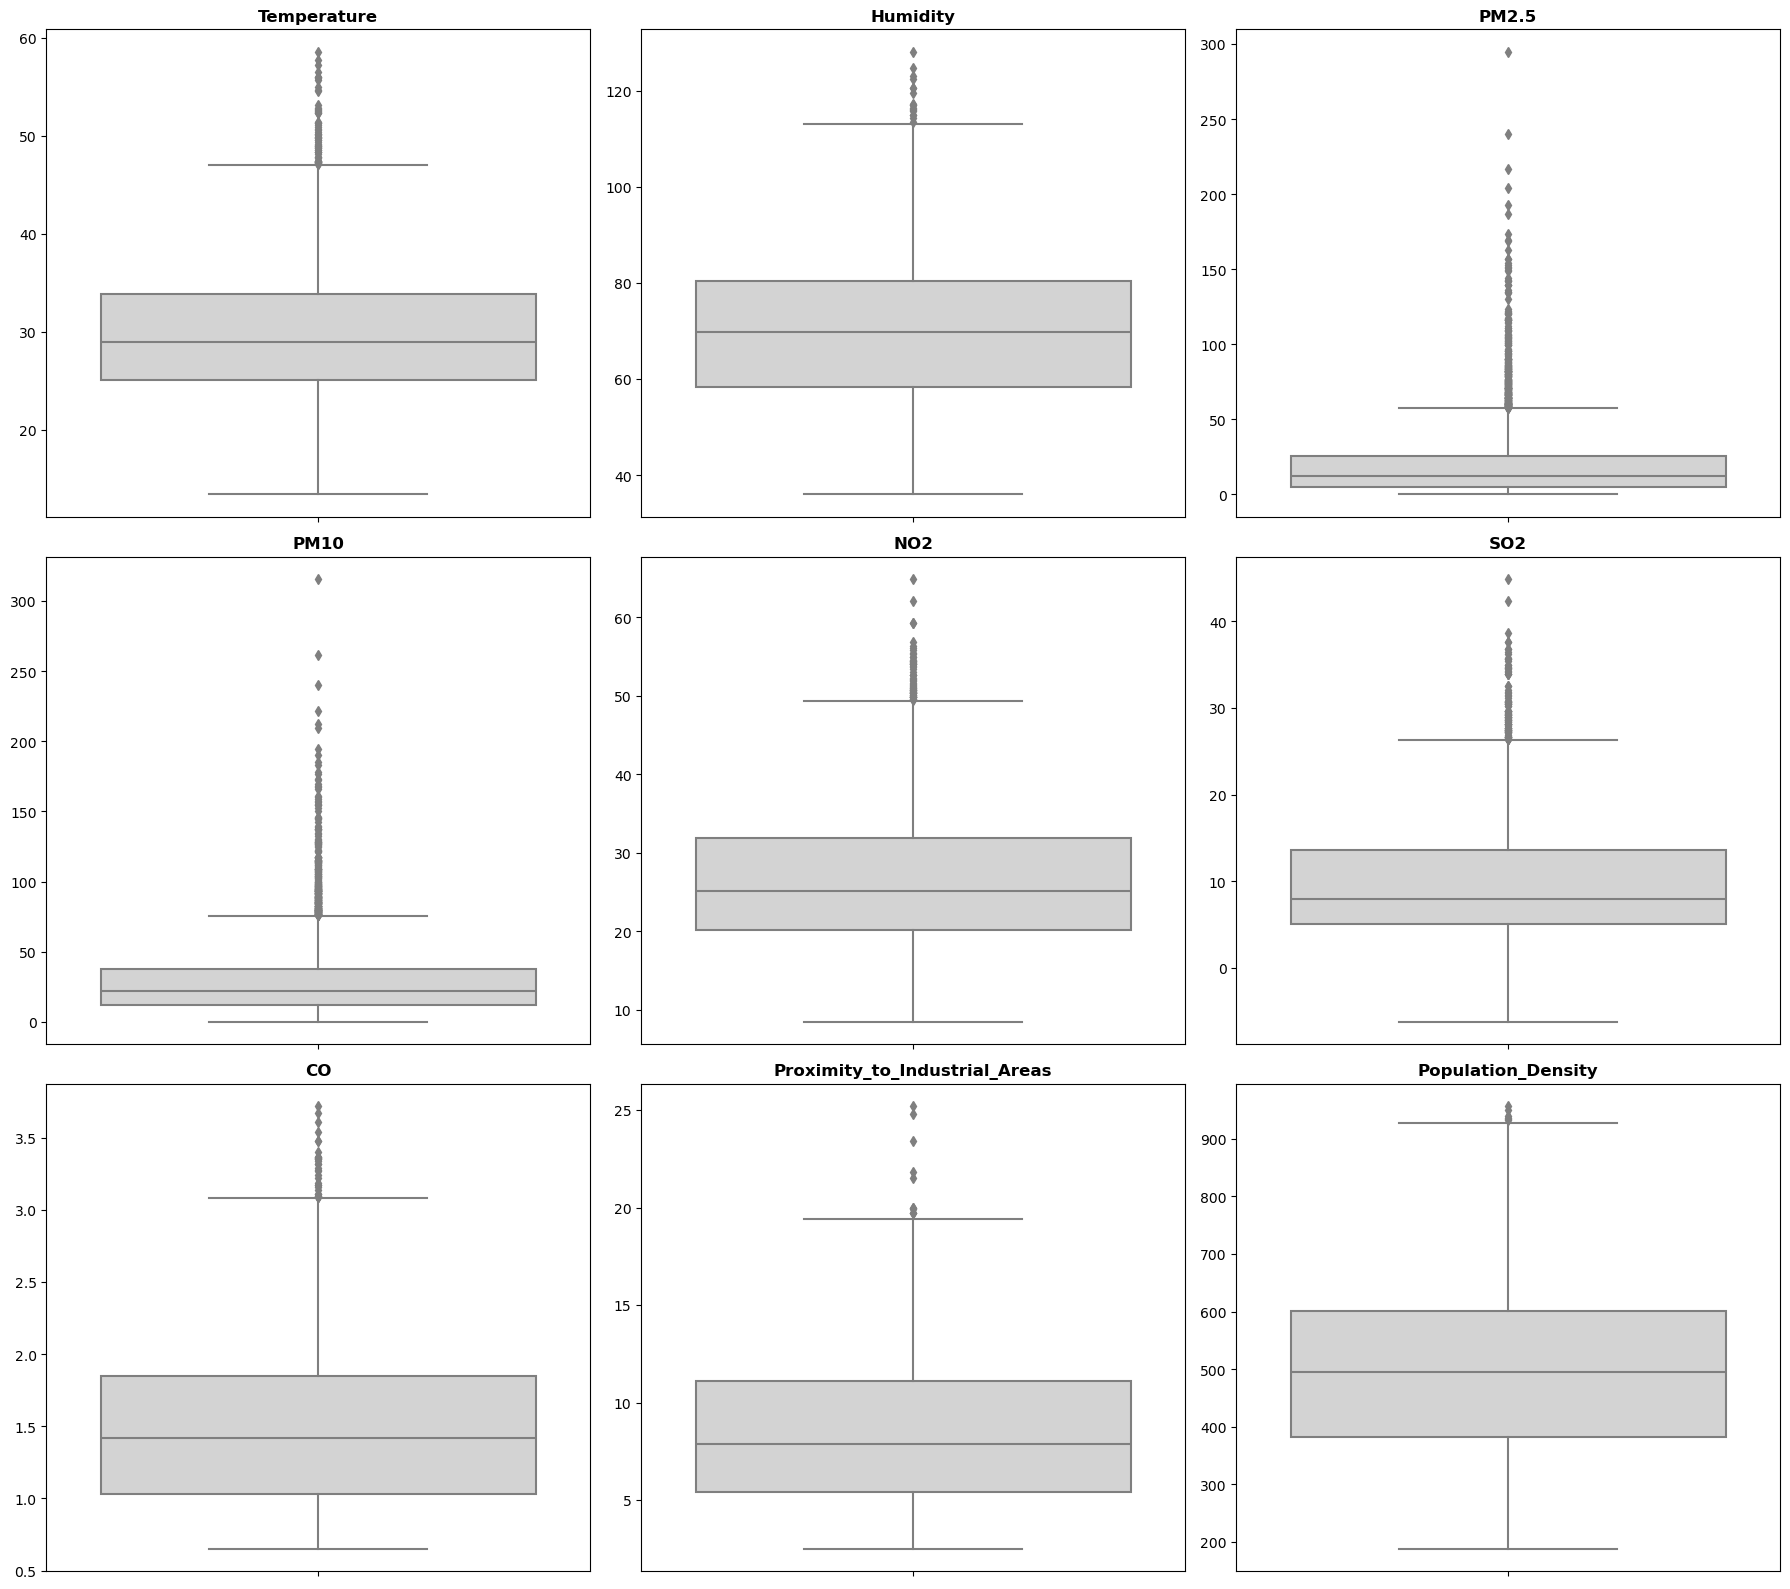

In [149]:
warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(rows, cols, figsize=(18, 16))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=train, y=feature, color='lightgray', ax=axes[i])
    axes[i].set_title(feature, fontweight='bold')  
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [150]:
# Calculate the correlation matrix
correlation_matrix = train.corr(numeric_only=True)
correlation_matrix

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
Temperature,1.000000,0.463315,0.331266,0.431864,0.584910,0.564027,0.680758,-0.584464,0.478477
Humidity,0.463315,1.000000,0.278197,0.361836,0.492167,0.461601,0.563459,-0.483862,0.404674
PM2.5,0.331266,0.278197,1.000000,0.973339,0.348961,0.309854,0.401199,-0.319816,0.279830
PM10,0.431864,0.361836,0.973339,1.000000,0.451568,0.409045,0.522409,-0.430046,0.364536
NO2,0.584910,0.492167,0.348961,0.451568,1.000000,0.573737,0.710493,-0.611760,0.507093
SO2,0.564027,0.461601,0.309854,0.409045,0.573737,1.000000,0.677330,-0.571701,0.479271
CO,0.680758,0.563459,0.401199,0.522409,0.710493,0.677330,1.000000,-0.709074,0.589982
Proximity_to_Industrial_Areas,-0.584464,-0.483862,-0.319816,-0.430046,-0.611760,-0.571701,-0.709074,1.000000,-0.498300
Population_Density,0.478477,0.404674,0.279830,0.364536,0.507093,0.479271,0.589982,-0.498300,1.000000


In [151]:
# Remove diagonal part
correlation_matrix = correlation_matrix.mask(np.equal(*np.indices(correlation_matrix.shape)))

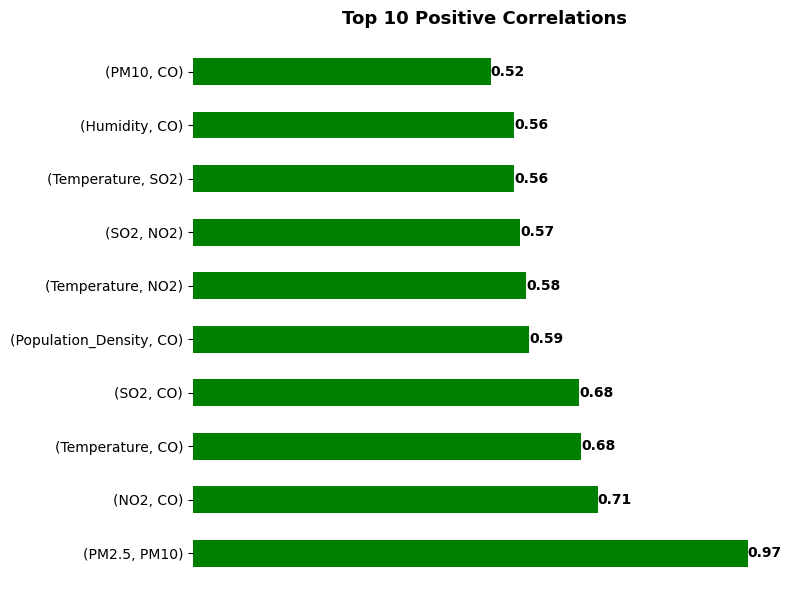

In [152]:
positive_correlations = correlation_matrix.unstack()

# Remove duplicates
positive_correlations = positive_correlations[positive_correlations > 0]
positive_correlations = positive_correlations[positive_correlations.index.get_level_values(0) > positive_correlations.index.get_level_values(1)]

positive_correlations = positive_correlations.sort_values(ascending=False).head(10)

# Ploting negative correlations
plt.figure(figsize=(8, 6))
ax = positive_correlations.plot(kind='barh', color='green')
plt.title('Top 10 Positive Correlations', fontweight='bold', fontsize=13, pad=15, loc='center')
plt.xlabel("")
plt.ylabel("")
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i, v in enumerate(positive_correlations):
    plt.text(v, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


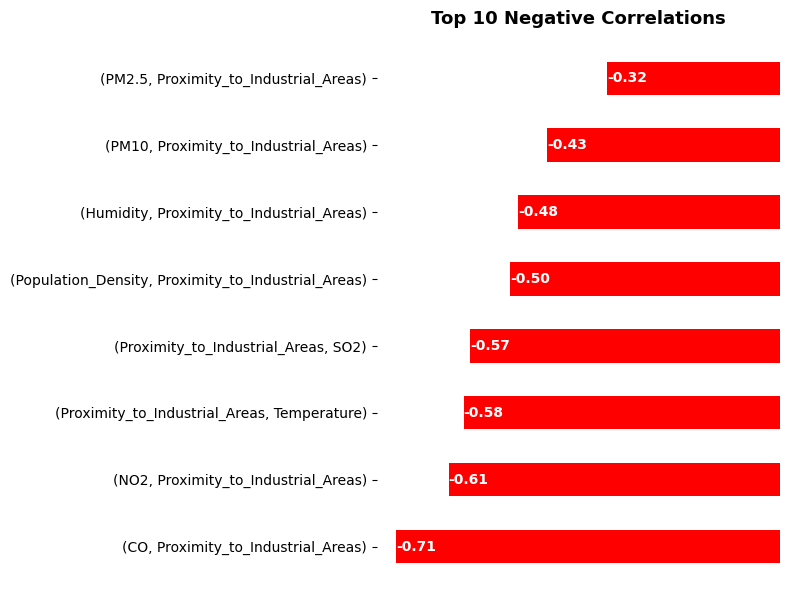

In [153]:
negative_correlations = correlation_matrix.unstack()

# Remove duplicates
negative_correlations = negative_correlations[negative_correlations < 0]
negative_correlations = negative_correlations[negative_correlations.index.get_level_values(0) < negative_correlations.index.get_level_values(1)]

negative_correlations = negative_correlations.sort_values(ascending=True).head(10)

# Ploting negative correlations
plt.figure(figsize=(8, 6))
ax = negative_correlations.plot(kind='barh', color='red')
plt.title('Top 10 Negative Correlations', fontweight='bold', fontsize=13, pad=15, loc='center')
plt.xlabel("")
plt.ylabel("")
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i, v in enumerate(negative_correlations):
    plt.text(v, i, f"{v:.2f}", color='white', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Main insights:
- The greater the distance from industrial areas, the lower the carbon, nitrogen, sulfur concentration.  
- Temperature, humidity, and population density also decrease as the distance from industrial areas increases.  
- The higher the temperature, population density, and humidity, the greater the carbon concentration.
- The higher the nitrogen concentration, the greater the carbon concentration as well.
- The higher the PM10 levels, the greater the carbon concentration.


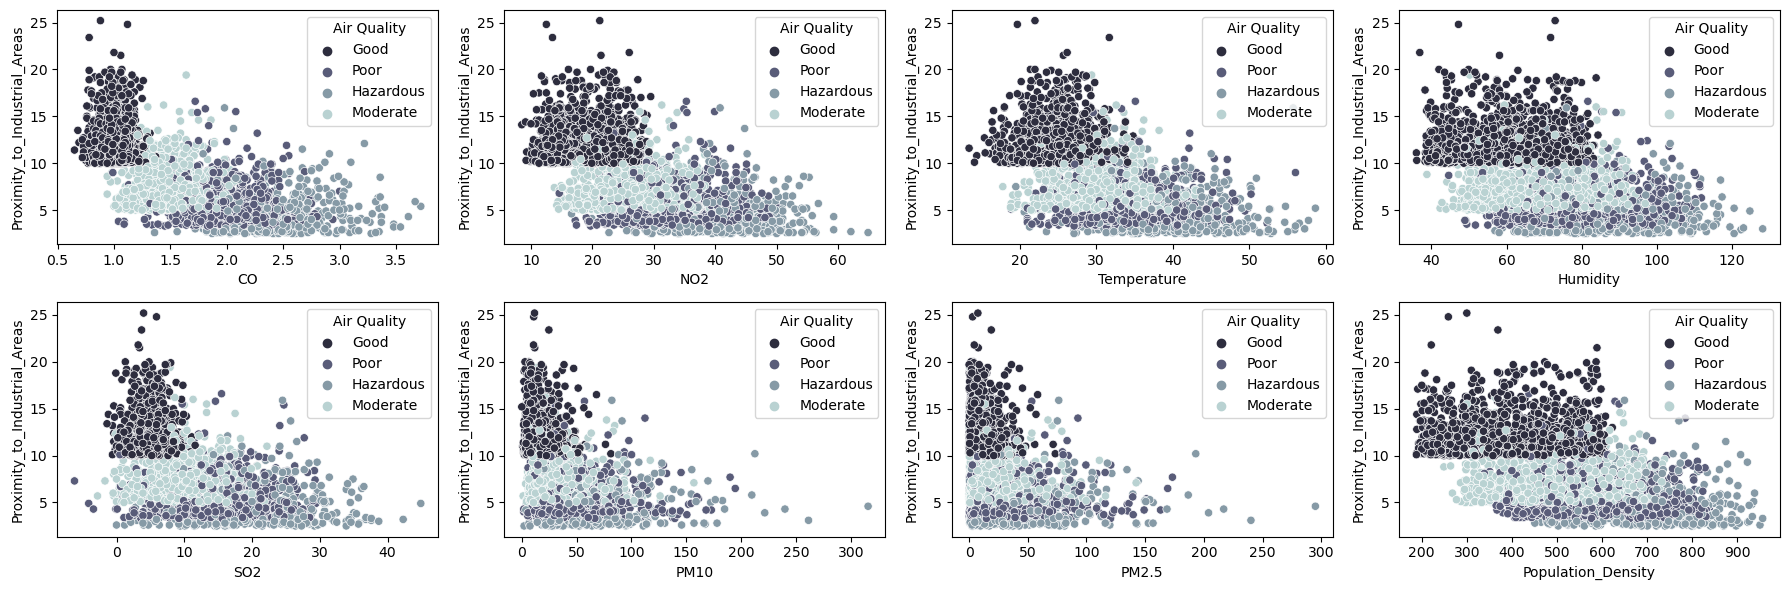

In [154]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
sns.scatterplot(data=train, x='CO', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[0][0])
sns.scatterplot(data=train, x='NO2', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[0][1])
sns.scatterplot(data=train, x='Temperature', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[0][2])
sns.scatterplot(data=train, x='Humidity', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[0][3])
sns.scatterplot(data=train, x='SO2', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[1][0])
sns.scatterplot(data=train, x='PM10', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[1][1])
sns.scatterplot(data=train, x='PM2.5', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[1][2])
sns.scatterplot(data=train, x='Population_Density', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='bone', ax=axes[1][3])
plt.tight_layout()
plt.show()

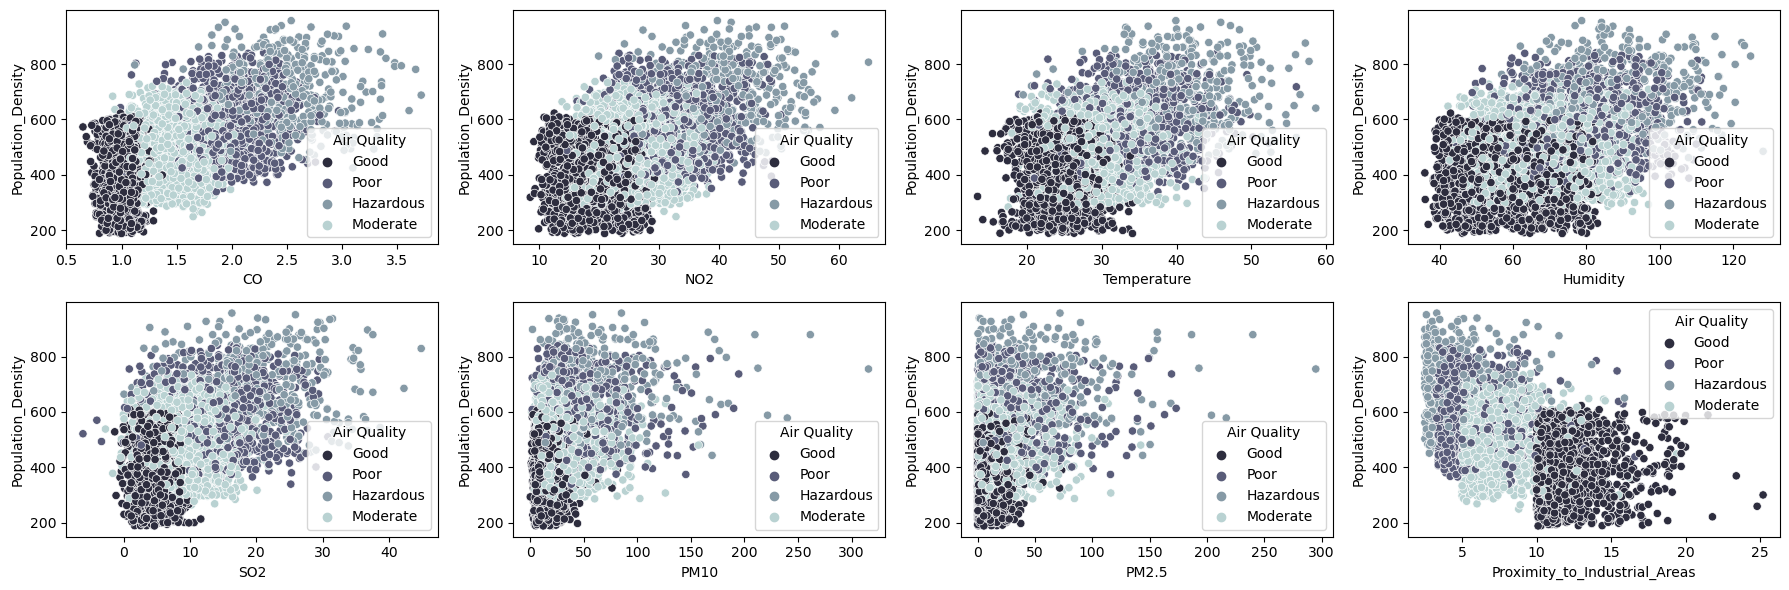

In [155]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
sns.scatterplot(data=train, x='CO', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[0][0])
sns.scatterplot(data=train, x='NO2', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[0][1])
sns.scatterplot(data=train, x='Temperature', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[0][2])
sns.scatterplot(data=train, x='Humidity', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[0][3])
sns.scatterplot(data=train, x='SO2', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[1][0])
sns.scatterplot(data=train, x='PM10', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[1][1])
sns.scatterplot(data=train, x='PM2.5', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[1][2])
sns.scatterplot(data=train, x='Proximity_to_Industrial_Areas', y='Population_Density', hue='Air Quality', palette='bone', ax=axes[1][3])
plt.tight_layout()
plt.show()

Main Insights:  
- PM2.5, PM10, NO2, SO2, CO: As the levels of these variables increase, air quality tends to worsen (from "Good" to "Moderate," "Poor," and "Hazardous"). This is consistent with the impact of pollutants on air quality. These variables are the main indicators of pollution.  
- Samples closer to industrial areas tend to show a higher concentration of "Poor" and "Hazardous" air quality points. This suggests that industrial areas play a significant role in the deterioration of air quality.  
- Higher population density values show a wide variation in air quality, indicating that other factors (such as proximity to industrial areas and specific pollutants) also significantly influence air quality. Even in areas with high population density, "Good" air quality can be found, suggesting well-managed urban regions.  
- Appears to have less direct impact on air quality compared to pollutants but may be indirectly associated, influencing the dispersion or chemical reactions of pollutants.
Humidity: Higher humidity tends to be more associated with "Good" or "Moderate" air quality conditions, though this can vary depending on other local factors.  
- In areas with low proximity to industrial regions, air quality is "Good."  
- In areas with high proximity to industrial regions, air quality is "Poor" or "Hazardous." These groups may reflect different environmental or geographic conditions in the analyzed regions.

### **Building the Model**  
Training and evaluate some models

In [156]:
warnings.filterwarnings("ignore")
SEED = 42
# Models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
    "SVM": SVC(random_state=SEED),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)  
    val_score = model.score(X_test, y_test)   
    y_pred = model.predict(X_test)
    print(f"{name} \n{classification_report(y_test, y_pred)}")
    
    results.append({"Model": name, "Train Score": train_score, "Validation Score": val_score})


Logistic Regression 
              precision    recall  f1-score   support

        Good       0.96      0.98      0.97       400
   Hazardous       0.38      0.36      0.37       100
    Moderate       0.76      0.75      0.75       300
        Poor       0.50      0.50      0.50       200

    accuracy                           0.75      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.75      0.75      0.75      1000

Random Forest 
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.90      0.80      0.85       100
    Moderate       0.96      0.97      0.97       300
        Poor       0.87      0.90      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000

Gradient Boosting 
              precision    recall  f1-score   support

        Good       1

In [157]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Score,Validation Score
0,Logistic Regression,0.75500,0.754
1,Random Forest,1.00000,0.951
2,Gradient Boosting,0.98925,0.950
3,SVM,0.76100,0.732
4,K-Nearest Neighbors,0.86550,0.791
5,Naive Bayes,0.92725,0.910


#### **Feature Selection**
First, I plotted the feature importances and used RFE to verify if the selected features are the same.

In [158]:
feature_importances = RandomForestClassifier(random_state=SEED, n_estimators=10)
feature_importances.fit(X_train, y_train)
print(feature_importances.feature_importances_)

[0.08010964 0.04616483 0.01094789 0.01841154 0.08358821 0.10074138
 0.33919086 0.28454918 0.03629647]


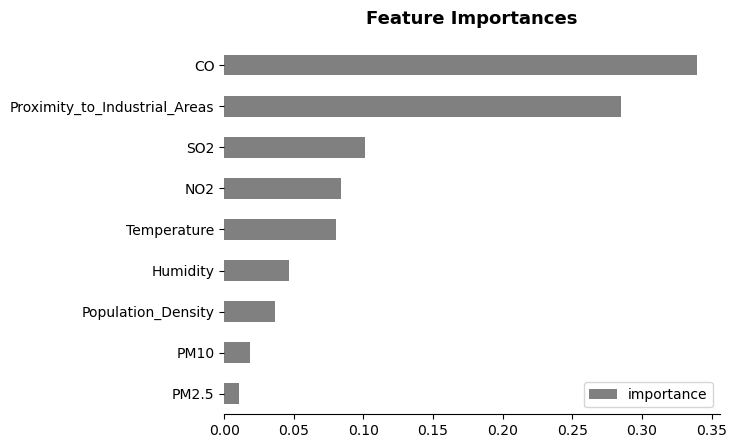

In [159]:
feature_importances = pd.DataFrame(feature_importances.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=True)

ax = feature_importances.plot(kind='barh', color='gray')
plt.title('Feature Importances', fontweight='bold', fontsize=13, pad=15, loc='center')
plt.xlabel("")
plt.ylabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [160]:
model_with_feature_selection = RandomForestClassifier(random_state=SEED)

In [161]:

rfe = RFE(estimator=model_with_feature_selection, n_features_to_select=4)
fit = rfe.fit(X_train, y_train)
print(f'Number of Features: {fit.n_features_}')


Number of Features: 4


In [162]:
features = fit.get_support(indices=True)
X_train_with_selector_features = X_train.iloc[:, features]
X_train_with_selector_features.head(5)

,NO2,SO2,CO,Proximity_to_Industrial_Areas
408,24.5,4.3,0.87,12.0
3420,15.2,7.2,1.12,10.4
1073,15.6,4.4,0.93,10.8
169,35.9,14.7,2.97,5.2
3881,45.5,15.4,3.34,6.3


In [163]:
features = fit.get_support(indices=True)
X_test_with_selector_features = X_test.iloc[:, features]
X_test_with_selector_features.head(5)

,NO2,SO2,CO,Proximity_to_Industrial_Areas
460,22.9,8.2,1.46,6.4
536,17.0,2.6,1.02,10.6
64,22.0,3.8,1.16,11.0
2629,33.9,13.2,2.30,4.4
4690,18.0,12.0,1.57,5.7


In [165]:
model_with_feature_selection.fit(X_train_with_selector_features, y_train)
train_score = model_with_feature_selection.score(X_train_with_selector_features, y_train)  
val_score = model_with_feature_selection.score(X_test_with_selector_features, y_test)   
y_pred = model_with_feature_selection.predict(X_test_with_selector_features)
print(f"{classification_report(y_test, y_pred)}")

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.86      0.76      0.81       100
    Moderate       0.95      0.94      0.95       300
        Poor       0.82      0.86      0.84       200

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



Since our dataset has few features, it's not worth using a feature selector because the model's performance won't improve enough, and in the case of using fewer features, it might even perform worse, as was the case with the 4 most important features.


#### **Using GridSearchCV**
I chose use GridSearchCV to systematically and efficiently optimize hyperparameters for machine learning models, ensuring better performance.

In [167]:
model_with_gridsearch = RandomForestClassifier(random_state=SEED)


# Parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model_with_gridsearch, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [169]:
best_params = grid_search.best_params_

# Using best parameters
model_best = RandomForestClassifier(random_state=SEED, **best_params)

# Training the model
model_best.fit(X_train, y_train)

y_pred = model_best.predict(X_test)

In [170]:
print(f"{classification_report(y_test, y_pred)}")

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.91      0.79      0.84       100
    Moderate       0.96      0.97      0.97       300
        Poor       0.86      0.90      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.95      0.95      0.95      1000



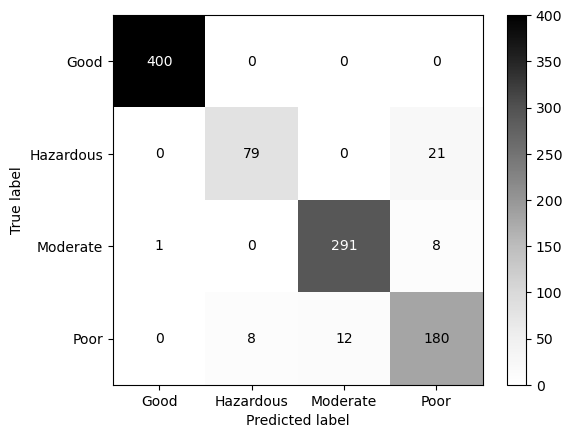

In [180]:
y_pred = model_best.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

labels = ['Good', 'Hazardous', 'Moderate', 'Poor']  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Grays)

plt.show()

## **Conclusion**  
In this project, a machine learning model was developed to classify air quality into four levels: Good, Moderate, Poor, and Hazardous. Using a dataset with environmental and demographic variables, the study identified key factors affecting air pollution, such as proximity to industrial areas, pollutant concentrations (PM2.5, PM10, NO2, SO2, and CO), and population density.

The tested models delivered consistent results, with the Random Forest optimized through GridSearchCV standing out, achieving an accuracy of 95%. This performance highlights the effectiveness of the approach applied to the classification problem. Furthermore, exploratory analysis revealed significant correlations between pollutants and air quality degradation, emphasizing the need for targeted interventions in regions with higher industrial concentration.

Finally, this project contributes to data-driven decision-making, offering valuable insights for shaping public policies aimed at mitigating the impacts of pollution. The methodologies and results presented can serve as a foundation for future studies and the development of practical solutions to promote sustainability and public health.

